Default RF Accuracy (n_estimators=100): 1.0000

Best accuracy of 1.0000 achieved with 1 trees.


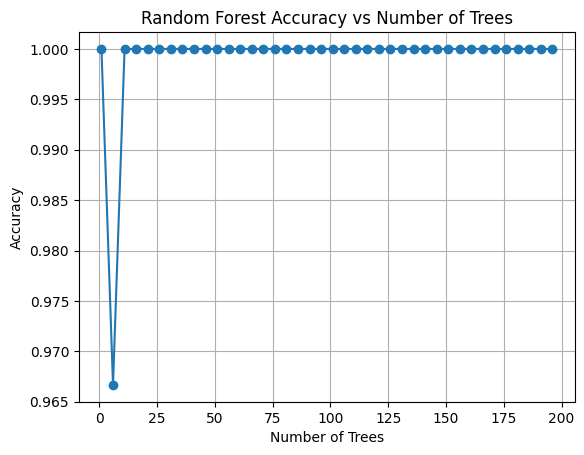

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("/content/iris (2).csv")  # Make sure the file is in the same directory

# Step 2: Prepare features and target
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column is the target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest with default number of trees
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"Default RF Accuracy (n_estimators=100): {default_accuracy:.4f}")

# Step 5: Fine-tune number of trees and find the best accuracy
best_score = 0
best_n = 0
scores = []

for n in range(1, 201, 5):  # Try n_estimators from 1 to 200, step by 5
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append((n, score))
    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest accuracy of {best_score:.4f} achieved with {best_n} trees.")

# Optional: Plot accuracy vs number of trees
n_values, accuracy_values = zip(*scores)
plt.plot(n_values, accuracy_values, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Best Accuracy: 1.0000
Number of Trees: 1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


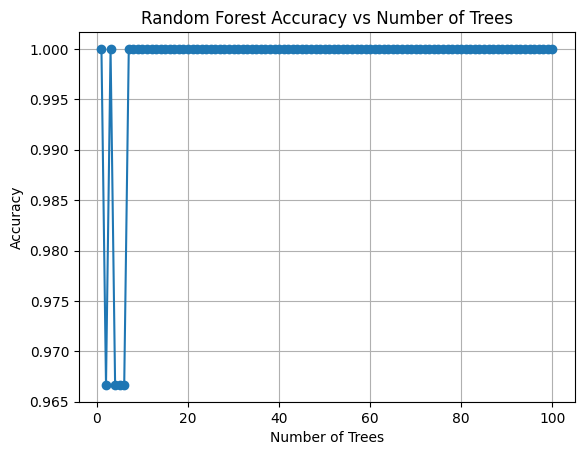

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("/content/iris (2).csv")  # Ensure the file is in your working directory

# Step 2: Prepare features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Find the best number of trees
best_score = 0
best_n = 0
scores = []

for n in range(1, 101):  # Try different values for n_estimators
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append((n, score))
    if score > best_score:
        best_score = score
        best_n = n

# Step 5: Train final model with best_n
best_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_final = best_rf.predict(X_test)

# Calculate accuracy and confusion matrix
final_accuracy = accuracy_score(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Display results
print(f"Best Accuracy: {final_accuracy:.4f}")
print(f"Number of Trees: {best_n}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot accuracy vs. number of trees
n_values, accuracy_values = zip(*scores)
plt.plot(n_values, accuracy_values, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
